# Ford GoBike Ride Duration Exploration
## by Joel Chua

## Investigation Overview

In this investigation, I wanted to explore the usage and ride behaviou of Ford GoBikes users. Specifically the usage in terms of ride and ride duration between it's "Customers" and "Subscribers". 


## Dataset Overview

The data consists of features of approximately 174,000 rides. There are 15 variables within the dataset, including ride duration, ride start and end time and user demographic info such as user type, gender and birth year. 17536 data points were removed from the analysis due to incomplete or inconsistent data.


In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd 
import numpy as np 
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('bikedata_master.csv')

## Distribution of Ride Durations

The ride durations take on a large range of values, from 1 minute up to about 1400 minutes for the longest ride. When plotted on a logarithmic scale, the distribution takes on a unimodal shape, with the peaks at around the 10-minute mark.

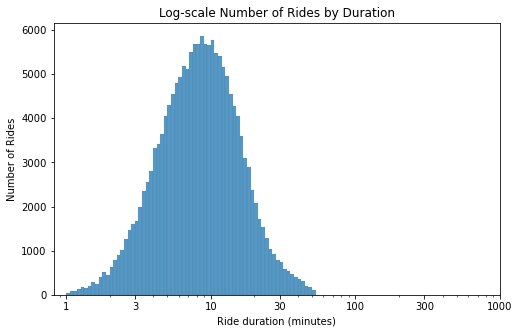

In [3]:
# creating the log binsize and tick lables
binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+binsize, binsize)
ticks = [1, 3 ,10, 30, 100, 300, 1000]
labels = ['{}'.format(i) for i in ticks]

# Plotting the log scale distribution
plt.figure(figsize=(8,5))
sns.histplot(data = df, x = 'duration_min', bins=bins, color = sns.color_palette()[0])
plt.xscale('log')
plt.xticks(ticks, labels)

plt.xlabel('Ride duration (minutes)')
plt.ylabel('Number of Rides')
plt.title('Log-scale Number of Rides by Duration');

## Distribution of User Types

The Ford GoBike users are split into 2 categories, 'Customers' and 'Subscribers'.  Subscribers are users who have registered for any of the membership plans, while ‘Customers’ refer to users who are not register for any membership plans and use the bike on a pay-per-use basis.

From the figures below, it is clear that majority of the users are subscribers, with 90.8% of users being subscribers and the remaining 9.2% of users being customers. 

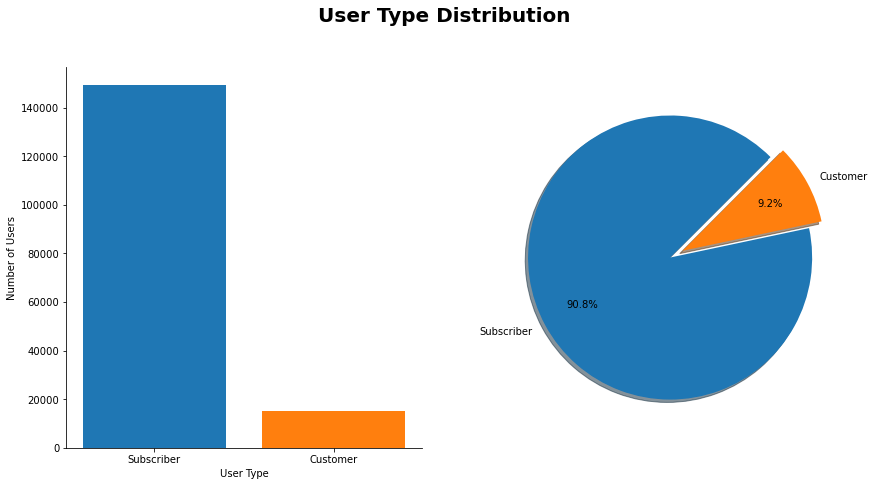

In [4]:
# Creating the subplot and data to be plotted
fig, axs = plt.subplots(1,2, figsize = [14,7])
data = df.user_type.value_counts()

# Plotting sns bargraph
axs[0].bar(data.index, data.values, color=['tab:blue', 'tab:orange'])

axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)
axs[0].set_xlabel('User Type')
axs[0].set_ylabel('Number of Users')


# lotting plt pie chart to show percentage
axs[1].pie(x=data, autopct="%.1f%%", labels=data.index,
           explode=(0,0.1),startangle=45, pctdistance=0.7, shadow=True)

# overall title
plt.suptitle('User Type Distribution', y=1, fontsize=20, fontweight='semibold');

## Hourly Ride Duration and Distribution by User Type 

In the next visualisation, we will take a look at the hourly ride durations, as well as the hourly distribution of rides across the 2 user types.  

**Subscribers:**
* Ride duration for subscriber appears to be very consistent with a median ride duration of around 7 minutes across all hours.
* The distribution of subscribers forms a bimodal distribution with peaks of around 17,500 rides around 8am and 5pm.

**Customers:**
* Customers appear to have a higher average ride duration of 12 mins than subscribers across all hours of the day.
* There seems to be quite a bit of variability for the ride durations from midnight toll 5am.
* Outside of the variability mentioned above, it appears that customers median ride durations take on a unimodal distribution peaking around 1pm. 
* * The distribution of subscribers forms a bimodal distribution with peaks of around 2,000 rides around 8am and 5pm.



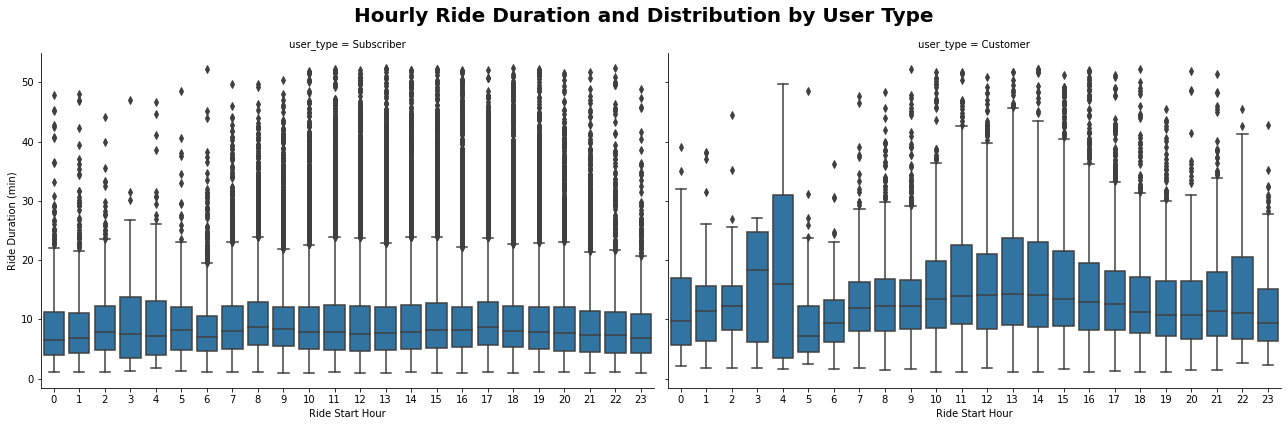

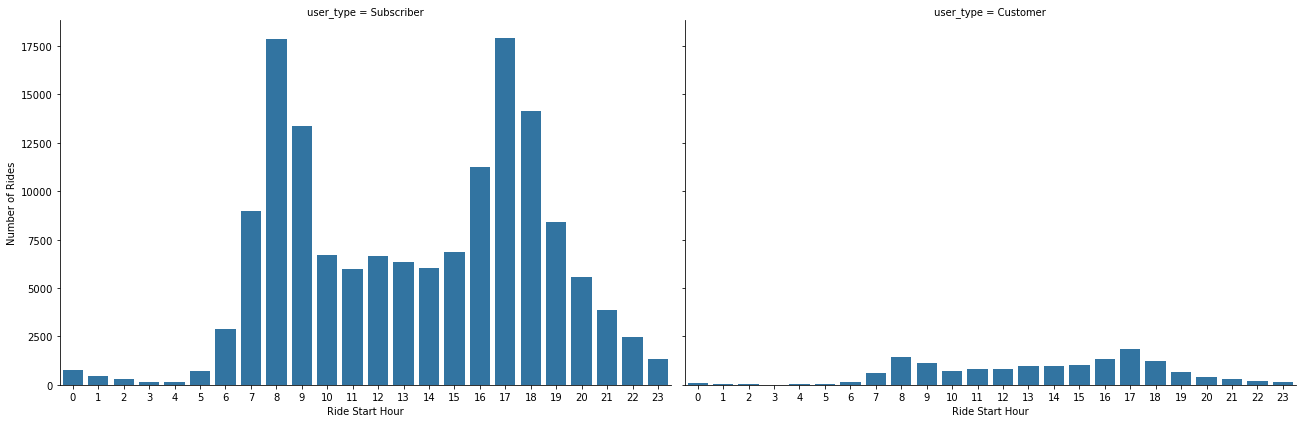

In [5]:
# Plotting duration by hour of the day, subsetted by user_type
grid = sns.FacetGrid(data=df, col = 'user_type', height = 6, aspect = 1.5 );
plt.suptitle('Hourly Ride Duration and Distribution by User Type', fontsize=20, fontweight='semibold')
grid.map(sns.boxplot, 'start_hour', 'duration_min');

grid.axes[0,0].set_xlabel('Ride Start Hour');
grid.axes[0,1].set_xlabel('Ride Start Hour');
grid.axes[0,0].set_ylabel('Ride Duration (min)');

# plotting number of rides by hour of the day, subsetted by user_type
grid = sns.FacetGrid(data=df, col = 'user_type', height = 6, aspect = 1.5 );
grid.map(sns.countplot, 'start_hour');

grid.axes[0,0].set_xlabel('Ride Start Hour');
grid.axes[0,1].set_xlabel('Ride Start Hour');
grid.axes[0,0].set_ylabel('Number of Rides');

## Total Hourly Bike Usage by User Type 

Next, we will explore the total ride duration of bteween customer and subscribers, sorted by thier start hour across each the days of the week. This would give us a good picture of the hourly bike usage between customers and subscribers.

**Customers:**
* On weekends, the highest usage of bikes has two peaks, the first around 7am to 9am and the second from 4pm to 6pm.
* On weekends, the customers riding behaviours shift to a heavier usage between 1am to 5pm.

**Subscribers:**
* On weekdays, there are 2 peak periods of bike usage: 7am to 9am and 4pm to 7pm; with the highest usage happening at 8am and 5pm. 
* On weekends, subscribers have a significantly lower bike usage. 
* For subscribers who do use the bikes on weekends, they tend to do so from 10am to 5pm.

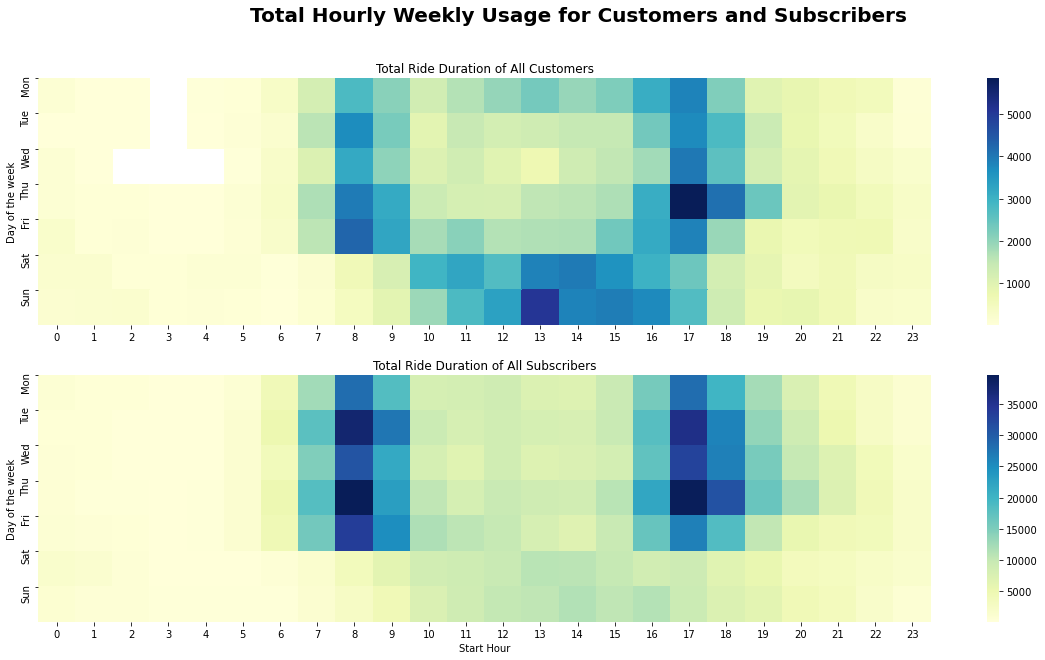

In [6]:
plt.figure(figsize=(20,10))
plt.suptitle('Total Hourly Weekly Usage for Customers and Subscribers', fontsize=20, fontweight='semibold')


plt.subplot(2,1,1)
hm_cust = df.query('user_type == "Customer"').groupby(['day','start_hour'])['duration_min'].sum().reset_index()
hm_cust = hm_cust.pivot('day','start_hour','duration_min')
ax=sns.heatmap(hm_cust, cmap="YlGnBu")

plt.title('Total Ride Duration of All Customers')
plt.xlabel('')
plt.ylabel('Day of the week')
plt.yticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

plt.subplot(2,1,2)
hm_subs = df.query('user_type == "Subscriber"').groupby(['day','start_hour'])['duration_min'].sum().reset_index()
hm_subs = hm_subs.pivot('day','start_hour','duration_min')
ax=sns.heatmap(hm_subs, cmap="YlGnBu")

plt.title('Total Ride Duration of All Subscribers')
plt.xlabel('Start Hour')
plt.ylabel('Day of the week')
plt.yticks([0,1,2,3,4,5,6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']);